Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8620 - loss: 0.4827 - val_accuracy: 0.9711 - val_loss: 0.1053
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9765 - loss: 0.0837 - val_accuracy: 0.9800 - val_loss: 0.0698
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9860 - loss: 0.0490 - val_accuracy: 0.9803 - val_loss: 0.0636
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9820 - val_loss: 0.0610
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9927 - loss: 0.0265 - val_accuracy: 0.9843 - val_loss: 0.0564
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0558
Test Accuracy: 0.9850000143051147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


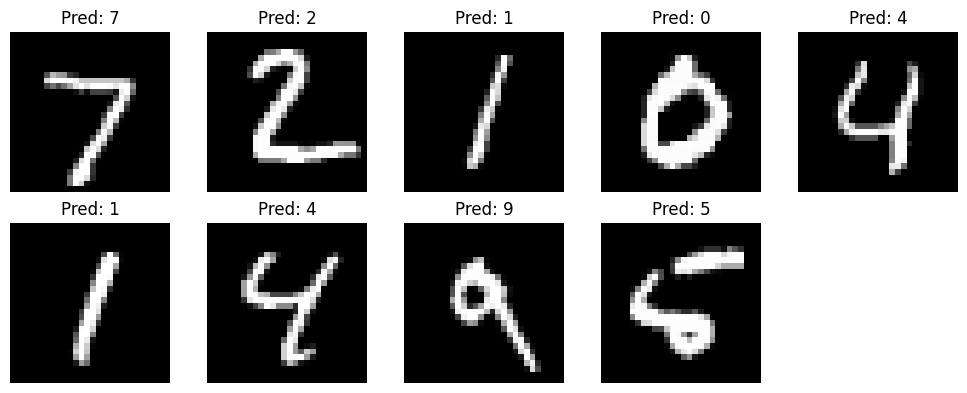

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict and plot some test images
predictions = model.predict(X_test[:9])
plt.figure(figsize=(10, 4))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Pred: {}".format(np.argmax(predictions[i])))
    plt.axis('off')
plt.tight_layout()
plt.show()
